In [1]:
import pandas as pd
import numpy as np

In [2]:
accumulated_data = pd.read_hdf("accumulated_weekend_data.h5", "data")
accumulated_data.describe()

,unix_epoch_milliseconds_mean,unix_epoch_milliseconds_std,robin_i_mean,robin_i_std,glaser_1_mean,glaser_1_std,x_ray_source_mean,x_ray_source_std,x_ray_exit_mean,x_ray_exit_std,...,lt_oven_2_sp_std,lt_oven_1_temp_mean,lt_oven_1_temp_std,lt_oven_2_temp_mean,lt_oven_2_temp_std,time_mean,time_std,run_id,start_time,stop_time
count,1.123000e+04,11230.000000,11230.000000,11230.000000,11230.000000,11230.000000,11230.000000,11230.000000,11230.000000,11230.000000,...,11230.0,11230.000000,11230.000000,11230.000000,11230.000000,1.123000e+04,11230.000000,11230.000000,1.123000e+04,1.123000e+04
mean,1.659257e+12,11513.822434,66.709872,0.005420,4.998830,0.008348,95.142119,0.760520,4.303500,0.131651,...,0.0,13.543679,0.009420,13.087892,0.007883,1.659257e+09,11.513822,4.936331,1.659257e+09,1.659257e+09
std,6.909664e+09,437.651150,21.797618,0.222462,10.569741,0.007523,77.879722,0.867462,2.372239,0.082528,...,0.0,29.560321,0.017823,29.181207,0.017936,6.909664e+06,0.437651,2.085128,6.909664e+06,6.909664e+06
min,1.645222e+12,11243.029225,0.068193,0.000000,-0.111683,0.000000,0.605128,0.000000,0.502564,0.000000,...,0.0,0.172058,0.000000,0.000000,0.000000,1.645222e+09,11.243029,1.000000,1.645222e+09,1.645222e+09
25%,1.651452e+12,11263.478431,59.872750,0.000000,-0.078300,0.004554,4.400000,0.191880,1.302564,0.000000,...,0.0,0.336072,0.005660,0.046936,0.003446,1.651452e+09,11.263478,3.000000,1.651452e+09,1.651452e+09
50%,1.662381e+12,11282.459996,61.011318,0.002472,0.148876,0.008366,81.800000,0.563262,5.302564,0.174660,...,0.0,0.350526,0.007495,0.060157,0.005660,1.662381e+09,11.282460,5.000000,1.662381e+09,1.662381e+09
75%,1.663535e+12,11565.855953,63.204227,0.006002,4.968741,0.010927,159.394870,1.054217,6.000000,0.194602,...,0.0,0.381776,0.007889,0.090654,0.007394,1.663535e+09,11.565856,6.000000,1.663535e+09,1.663535e+09
max,1.665402e+12,14783.367688,111.204841,23.574646,39.266910,0.275991,244.410259,15.251325,8.635897,0.617603,...,0.0,82.321557,0.200948,81.350638,0.213626,1.665402e+09,14.783368,8.000000,1.665402e+09,1.665402e+09


In [3]:
cuts = {
    "1": (1645222000, 1645512000),  # coils 'inj_i', 'ext_i', 'mid_i'
    "2": (1647625000, 1647845000),  # coils 'inj_i', 'ext_i', 'mid_i'
    "3": (1651285000, 1651476000),  # coils 'inj_i', 'ext_i', 'mid_i'
    "4": (1657920000, 1658173000),  # no beam current
    "5": (1662150000, 1662490000),  # bias_v, gas_balzer_2
    "6": (1663360000, 1663570000),  # bias_v, gas_balzer_2
    "7.0": (1664580000, 1664640000),  # bias_v, gas_balzer_2
    "7.5": (1664737000, 1664810000),  # bias_v, gas_balzer_2
    "8": (1665180000, 1665405000),  # bias_v, gas_balzer_2
}

In [4]:
# print(list(accumulated_data.columns))

In [5]:
time_column = ["unix_epoch_milliseconds_mean"]
input_columns = ['inj_i_mean', 'inj_i_std', 'ext_i_mean', 'ext_i_std', 'mid_i_mean', 'mid_i_std', 'bias_v_mean', 'bias_v_std', 'gas_balzer_2_mean', 'gas_balzer_2_std']
output_columns = ['fcv1_i_mean', 'fcv1_i_std']

In [6]:
# columns of data we care about
data = accumulated_data[time_column + input_columns+output_columns]
data.describe()

,unix_epoch_milliseconds_mean,inj_i_mean,inj_i_std,ext_i_mean,ext_i_std,mid_i_mean,mid_i_std,bias_v_mean,bias_v_std,gas_balzer_2_mean,gas_balzer_2_std,fcv1_i_mean,fcv1_i_std
count,1.123000e+04,11230.000000,11230.000000,11230.000000,11230.000000,11230.000000,11230.000000,11230.000000,11230.000000,11230.000000,11230.000000,1.123000e+04,1.123000e+04
mean,1.659257e+12,166.964920,0.004615,126.851641,0.003776,137.743131,0.005964,50.811496,0.135152,11.833581,0.000657,2.736824e-04,1.047644e-05
std,6.909664e+09,27.860038,0.007103,15.835996,0.006954,23.586019,0.018365,32.462884,0.180549,2.384414,0.001062,1.659991e-04,2.068208e-05
min,1.645222e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.440962,0.000000,0.463928,0.000000,-7.469863e-08,5.224231e-09
25%,1.651452e+12,127.890942,0.002115,107.329154,0.002115,105.977754,0.002087,33.856177,0.000000,11.530351,0.000000,1.397939e-04,2.123936e-06
50%,1.662381e+12,184.999910,0.002470,137.011959,0.002306,152.987624,0.002337,37.850578,0.112864,12.461737,0.000000,2.364073e-04,3.532441e-06
75%,1.663535e+12,185.000211,0.003129,137.012360,0.002596,152.988022,0.002715,67.084722,0.156356,12.825403,0.001380,4.125655e-04,8.279055e-06
max,1.665402e+12,185.003520,0.054462,137.033916,0.071816,152.992537,0.171562,183.534007,2.564779,14.524068,0.019207,6.278472e-04,1.506389e-04


In [7]:
run_num = "1"
bounds = cuts[run_num]
run_data = data[(data["unix_epoch_milliseconds_mean"]/1000 > bounds[0]) & (data["unix_epoch_milliseconds_mean"]/1000 <= bounds[1])]
run_data.describe()

,unix_epoch_milliseconds_mean,inj_i_mean,inj_i_std,ext_i_mean,ext_i_std,mid_i_mean,mid_i_std,bias_v_mean,bias_v_std,gas_balzer_2_mean,gas_balzer_2_std,fcv1_i_mean,fcv1_i_std
count,1.057000e+03,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1.057000e+03
mean,1.645401e+12,122.880652,0.009499,103.585376,0.004869,102.567829,0.003757,34.712653,0.089374,12.462430,0.000355,0.000106,2.726686e-06
std,8.005384e+07,3.212922,0.010894,3.806887,0.009082,3.626191,0.010407,0.064416,0.091104,0.000265,0.000688,0.000031,2.801844e-06
min,1.645222e+12,116.641614,0.001396,96.755023,0.001479,94.279915,0.001236,34.425660,0.000000,12.460453,0.000000,0.000024,2.671710e-07
25%,1.645351e+12,120.427618,0.003146,100.671064,0.002142,99.999724,0.002074,34.698372,0.000000,12.462539,0.000000,0.000083,1.245693e-06
50%,1.645418e+12,123.048502,0.005048,103.536982,0.002423,102.194407,0.002296,34.722435,0.070839,12.462539,0.000000,0.000112,1.864885e-06
75%,1.645467e+12,125.669290,0.007779,107.011881,0.002825,105.304860,0.002565,34.730456,0.144377,12.462539,0.000000,0.000131,3.004438e-06
max,1.645512e+12,127.935157,0.048229,110.003226,0.064567,110.000920,0.171562,34.979102,0.519813,12.462539,0.002949,0.000174,2.390607e-05


In [8]:
X = np.array(run_data[["inj_i_mean", "ext_i_mean", "mid_i_mean"]])
y = np.array(run_data[["fcv1_i_mean"]]).squeeze()
X.shape, y.shape

((1057, 3), (1057,))

In [12]:
x_scaler_dict = {
        "inj_i_mean": 1 / (130-117),
        "ext_i_mean": 1 / (110-97),
        "mid_i_mean": 1 / (110-95)
    }
x_scalar = np.array([x_scaler_dict[s] for s in ["inj_i_mean", "ext_i_mean", "mid_i_mean"]])

mat = np.array(run_data[["inj_i_std", "ext_i_std", "mid_i_std"]]) * x_scalar
np.corrcoef(mat.T)

array([[1.        , 0.22054546, 0.13087716],
       [0.22054546, 1.        , 0.20886043],
       [0.13087716, 0.20886043, 1.        ]])

In [13]:
np.linalg.eig(np.cov(mat.T))

(array([8.03069059e-07, 4.90805205e-07, 3.77914251e-07]),
 array([[ 0.82822413,  0.53855763,  0.15492083],
        [ 0.4478459 , -0.469909  , -0.76067048],
        [ 0.3368662 , -0.69938631,  0.6303808 ]]))

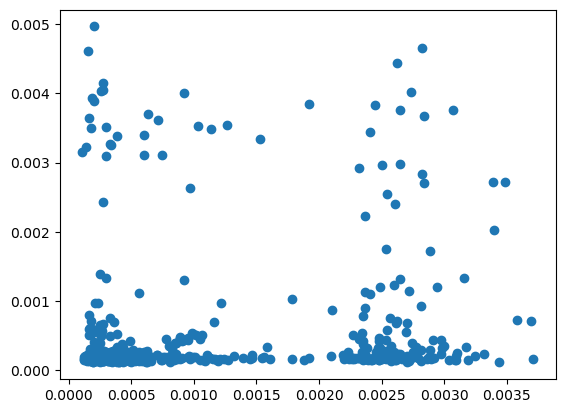

In [15]:
import matplotlib.pyplot as plt
plt.scatter(mat[:,0], mat[:,1])

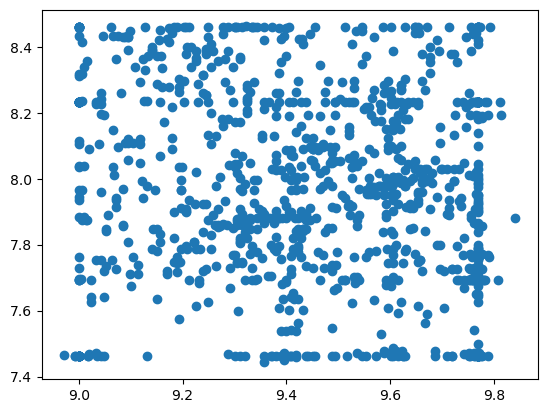

In [18]:
X = X * x_scalar
plt.scatter(X[:, 0], X[:, 1])

In [9]:
# full script for loadXy
def loadXy(data_dir, run_idx="1", xcolumns=["inj_i_mean", "ext_i_mean", "mid_i_mean"], ycolumns=["fcv1_i_mean"]):
    """
    Utility function for the specific data format.
    :param data_dir: directory to the data files
    :return: X (num_sample,input_dim), y (num_sample,), X_var (num_sample,)
    """
    # constant definitions
    time_column = ["unix_epoch_milliseconds_mean"]
    input_columns = ['inj_i_mean', 'inj_i_std', 'ext_i_mean', 'ext_i_std', 'mid_i_mean', 'mid_i_std', 'bias_v_mean', 'bias_v_std', 'gas_balzer_2_mean', 'gas_balzer_2_std']
    output_columns = ['fcv1_i_mean', 'fcv1_i_std']
    x_std_columns = [s.replace("mean", "std") for s in xcolumns]
    cuts = {
        "1": (1645222000, 1645512000),  # coils 'inj_i', 'ext_i', 'mid_i'
        "2": (1647625000, 1647845000),  # coils 'inj_i', 'ext_i', 'mid_i'
        "3": (1651285000, 1651476000),  # coils 'inj_i', 'ext_i', 'mid_i'
        "4": (1657920000, 1658173000),  # no beam current
        "5": (1662150000, 1662490000),  # bias_v, gas_balzer_2
        "6": (1663360000, 1663570000),  # bias_v, gas_balzer_2
        "7.0": (1664580000, 1664640000),  # bias_v, gas_balzer_2
        "7.5": (1664737000, 1664810000),  # bias_v, gas_balzer_2
        "8": (1665180000, 1665405000),  # bias_v, gas_balzer_2
    }
    # TODO: double check this with Damon
    x_scaler_dict = {
        "inj_i_mean": 1 / (130-117),
        "ext_i_mean": 1 / (110-97),
        "mid_i_mean": 1 / (110-95)
    }
    x_scalar = np.array([x_scaler_dict[s] for s in xcolumns])


    # reading data
    accumulated_data = pd.read_hdf(data_dir, "data")

    # extracting useful information
    data = accumulated_data[time_column+input_columns+output_columns]
    bounds = cuts[run_idx]
    run_data = data[(data["unix_epoch_milliseconds_mean"]/1000 > bounds[0]) & (data["unix_epoch_milliseconds_mean"]/1000 <= bounds[1])]
    run_data.describe()

    X = np.array(run_data[xcolumns]) * x_scalar
    y = np.array(run_data[ycolumns]).squeeze()
    X_var = (np.array(run_data[x_std_columns]) ** 2).sum(axis=1) # X_var = X1_std**2 + X2_std**2 + ...

    # dimension check
    assert(X.shape[0]==y.shape[0])
    assert(len(y.shape) == 1)
    assert(X.shape[0]==X_var.shape[0])

    return X, y, X_var
X, y, X_var = loadXy("accumulated_weekend_data.h5")
X, y, X_var

(array([[9.65290143, 7.93619504, 7.06503313],
        [9.49223948, 7.66304153, 6.46835486],
        [9.51222972, 7.69233269, 6.46747254],
        ...,
        [9.446598  , 8.10034306, 6.76825134],
        [9.26775809, 7.85452197, 6.70756763],
        [9.27294847, 7.85644218, 6.71141089]]),
 array([1.27523310e-04, 9.76177600e-05, 9.48758131e-05, ...,
        1.33310915e-04, 1.33502487e-04, 1.34052882e-04]),
 array([1.24542868e-05, 1.84110198e-02, 1.42168712e-05, ...,
        2.89755646e-05, 8.38348236e-03, 1.44730580e-05]))

In [10]:
X.max(axis=0) - X.min(axis=0)

array([0.86873412, 1.01909251, 1.04806702])

In [11]:
X_var.shape

(1057,)